In [1]:
import graphviz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from subprocess import check_call

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
folder = './baseball-databank/'

In [4]:
database = {'AllstarFull': pd.read_csv(folder + 'AllstarFull.csv'),
            'AwardsManagers': pd.read_csv(folder + 'AwardsManagers.csv'),
            'AwardsPlayers': pd.read_csv(folder + 'AwardsPlayers.csv'),
            'AwardsShareManagers': pd.read_csv(folder + 'AwardsShareManagers.csv'),
            'AwardsSharePlayers': pd.read_csv(folder + 'AwardsSharePlayers.csv'),
            'Batting': pd.read_csv(folder + 'Batting.csv'),
            'BattingPost': pd.read_csv(folder + 'BattingPost.csv'),
            'Fielding': pd.read_csv(folder + 'Fielding.csv'),
            'FieldingOF': pd.read_csv(folder + 'FieldingOF.csv'),
            'HallOfFame': pd.read_csv(folder + 'HallOfFame.csv'),
            'Managers': pd.read_csv(folder + 'Managers.csv'),
            'ManagersHalf': pd.read_csv(folder + 'ManagersHalf.csv'),
            'Master': pd.read_csv(folder + 'Master.csv'),
            'Pitching': pd.read_csv(folder + 'Pitching.csv'),
            'PitchingPost': pd.read_csv(folder + 'PitchingPost.csv'),
            'Salaries': pd.read_csv(folder + 'Salaries.csv'),
            'SeriesPost': pd.read_csv(folder + 'SeriesPost.csv'),
            'HallOfFame': pd.read_csv(folder + 'HallOfFame.csv'),
            'Teams': pd.read_csv(folder + 'Teams.csv'),
            'TeamsFranchises': pd.read_csv(folder + 'TeamsFranchises.csv'),
            'TeamsHalf': pd.read_csv(folder + 'TeamsHalf.csv')}

In [5]:
#for k, v in database.items():
#    print('This is the "%s" database.....' % k)
#    print('------------------------------------------------------------')
#    print(v.head(3))
#    print('------------------------------------------------------------')

In [6]:
#print('Batting\' shape: ', database['Batting'].shape, 'BattingPost\' shape: ',  database['BattingPost'].shape)

In [7]:
#for df, title in zip([database['Batting'],  database['BattingPost']], ['Batting', 'BattingPost']):
#    print('------------------------------------------------------------')
#    print('Now is showing %s...' % title)
#    print('------------------------------------------------------------')
#    print(df.columns)
#    print('------------------------------------------------------------')
#    print(df.head())
#    print('------------------------------------------------------------')
#    print(df.dtypes)
#    print('------------------------------------------------------------')

In [8]:
for x in zip([1, 2, 3], ['a', 'b', 'c']):
    print(x)
print(type(x))

(1, 'a')
(2, 'b')
(3, 'c')
<class 'tuple'>


In [9]:
#database['Batting'].isnull().sum()

In [10]:
#database['BattingPost'].isnull().sum()

In [11]:
#(database['Batting'] == 0).astype(int).sum(axis=0)

In [12]:
#(database['BattingPost'] == 0).astype(int).sum(axis=0)

# Lets have some description first

In [13]:
for df, title in zip([database['Batting'],  database['BattingPost']], ['Batting', 'BattingPost']):
    print('------------------------------------------------------------')
    print('It is %s description.' % title)
    print(df.describe())
    print('------------------------------------------------------------')

------------------------------------------------------------
It is Batting description.
              yearID          stint              G            AB  \
count  101332.000000  101332.000000  101332.000000  96183.000000   
mean     1963.506533       1.077567      51.400111    149.970327   
std        38.628278       0.283676      47.145273    186.557072   
min      1871.000000       1.000000       0.000000      0.000000   
25%      1933.000000       1.000000      13.000000      7.000000   
50%      1972.000000       1.000000      34.000000     57.000000   
75%      1997.000000       1.000000      80.250000    251.000000   
max      2015.000000       5.000000     165.000000    716.000000   

                  R             H            2B            3B            HR  \
count  96183.000000  96183.000000  96183.000000  96183.000000  96183.000000   
mean      19.887038     39.261647      6.637067      1.373361      2.949305   
std       28.671365     53.310941      9.801563      2.710547 

In [14]:
Batting_clean = database['Batting'][(database['Batting']['yearID'] > 2006) & (database['Batting']['G'] > 13.0)]

In [15]:
BattingPost_clean = database['BattingPost'][(database['BattingPost']['yearID'] > 2006) & (database['BattingPost']['G'] > 2.0)]

# Lets have some distribution

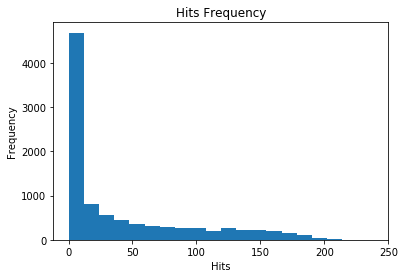

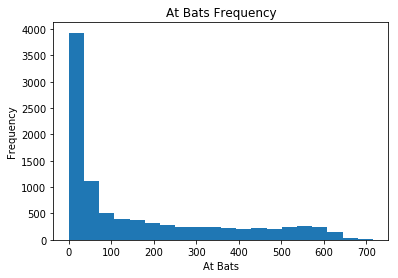

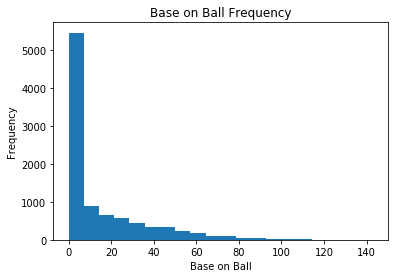

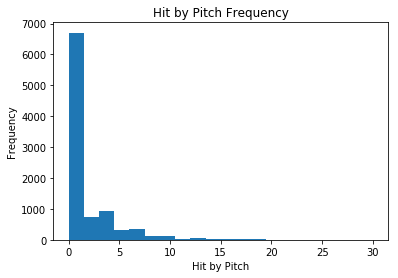

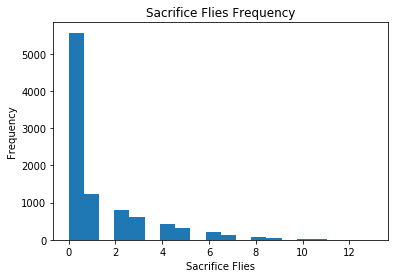

In [16]:
for col, title in zip(['H', 'AB', 'BB', 'HBP', 'SF'], ['Hits', 'At Bats', 'Base on Ball', 'Hit by Pitch', 'Sacrifice Flies']):
    Batting_clean[col].plot(kind='hist', bins=20)
    plt.title('%s Frequency' % title)
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.show()

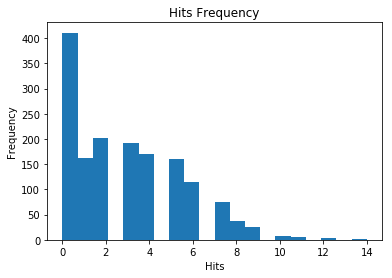

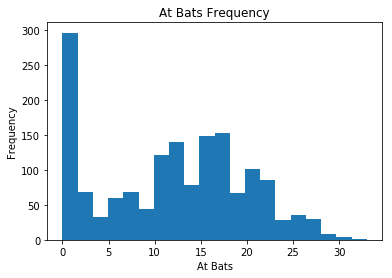

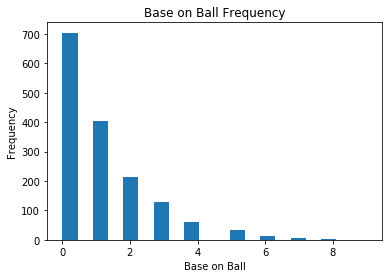

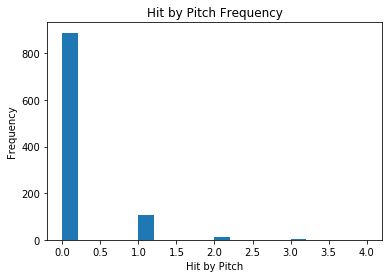

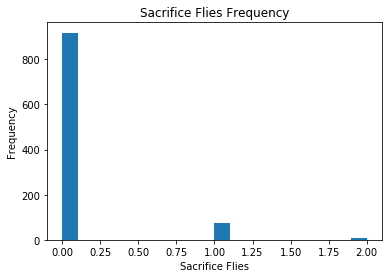

In [17]:
for col, title in zip(['H', 'AB', 'BB', 'HBP', 'SF'], ['Hits', 'At Bats', 'Base on Ball', 'Hit by Pitch', 'Sacrifice Flies']):
    BattingPost_clean[col].plot(kind='hist', bins=20)
    plt.title('%s Frequency' % title)
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.show()

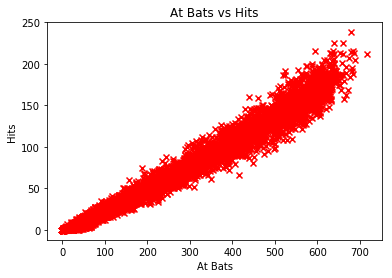

In [18]:
plt.scatter(Batting_clean['AB'], Batting_clean['H'], c='r', marker='x')
plt.title('At Bats vs Hits')
plt.xlabel('At Bats')
plt.ylabel('Hits')
plt.show()

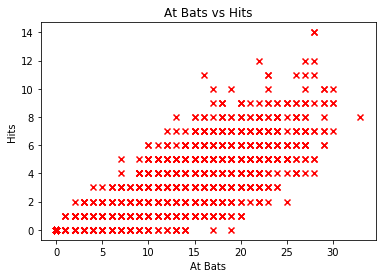

In [19]:
plt.scatter(BattingPost_clean['AB'], BattingPost_clean['H'], c='r', marker='x')
plt.title('At Bats vs Hits')
plt.xlabel('At Bats')
plt.ylabel('Hits')
plt.show()

# Batting Average

$$Batting\ Average = \frac{Hits}{At\ Bats}$$

In [20]:
Batting_clean['BA'] = Batting_clean['H'] / Batting_clean['AB']
BattingPost_clean['BA'] = BattingPost_clean['H'] / BattingPost_clean['AB']

In [21]:
#print('nan of ba in Batting: ', Batting_clean['BA'].isnull().sum())
#print('nan of ba in BattingPost: ', BattingPost_clean['BA'].isnull().sum())

This is the plot of Batting.


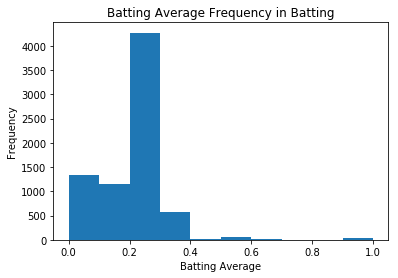

This is the plot of BattingPost.


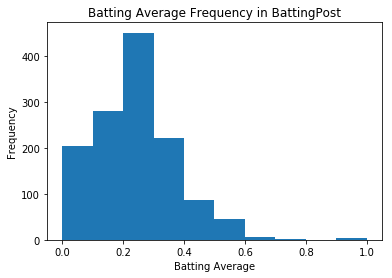

In [22]:
for df, title in zip([Batting_clean,  BattingPost_clean], ['Batting', 'BattingPost']):
    print('This is the plot of %s.' % title)
    df['BA'].plot(kind='hist', bins=10)
    plt.title('Batting Average Frequency in %s' % title)
    plt.xlabel('Batting Average')
    plt.ylabel('Frequency')
    plt.show()

In [23]:
merged = pd.merge(Batting_clean, BattingPost_clean, how='left', left_on=['yearID', 'playerID'], right_on=['yearID', 'playerID'])

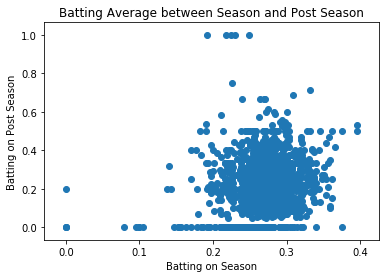

In [24]:
plt.scatter(merged['BA_x'], merged['BA_y'])
plt.title('Batting Average between Season and Post Season')
plt.xlabel('Batting on Season')
plt.ylabel('Batting on Post Season')
plt.show()

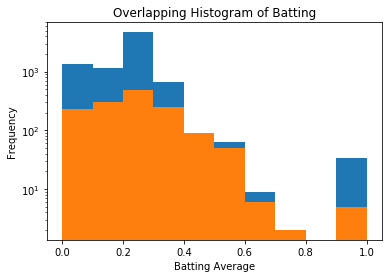

In [25]:
fig, ax = plt.subplots()
merged['BA_x'].plot(ax=ax, kind='hist', bins=10, logy=True, title='Batting on Season')
merged['BA_y'].plot(ax=ax, kind='hist', bins=10, logy=True, title='Batting on Post Season')
plt.title('Overlapping Histogram of Batting')
plt.xlabel('Batting Average')
plt.ylabel('Frequency')
plt.show()

# Extra Base Hit

$$ Extra\ Base\ Hit = 2B + 3B + HR $$

In [26]:
Batting_clean['XBH'] = Batting_clean['2B'] + Batting_clean['3B'] + Batting_clean['HR']
BattingPost_clean['XBH'] = BattingPost_clean['2B'] + BattingPost_clean['3B'] + BattingPost_clean['HR']

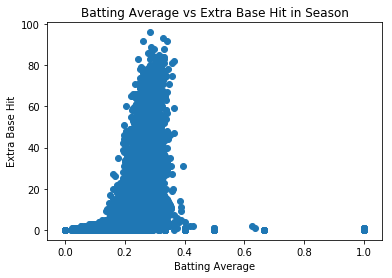

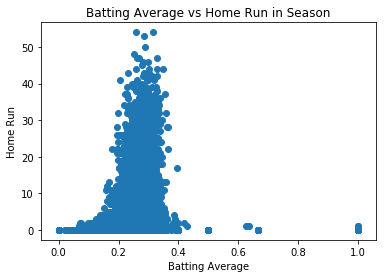

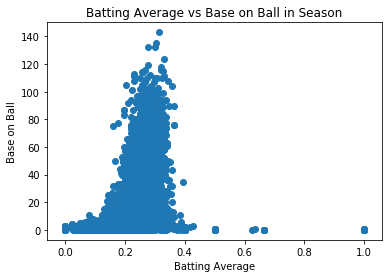

In [27]:
for col, title in zip(['XBH', 'HR', 'BB'], ['Extra Base Hit', 'Home Run', 'Base on Ball']):
    plt.title('Batting Average vs %s in Season' % title)
    plt.scatter(Batting_clean['BA'], Batting_clean[col])
    plt.xlabel('Batting Average')
    plt.ylabel(title)
    plt.show()

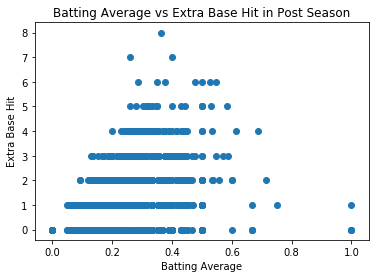

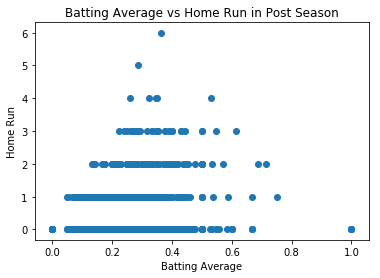

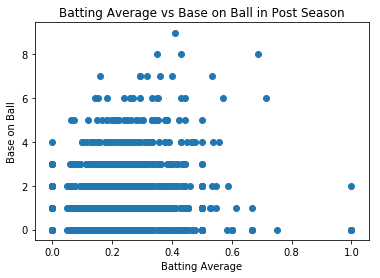

In [28]:
for col, title in zip(['XBH', 'HR', 'BB'], ['Extra Base Hit', 'Home Run', 'Base on Ball']):
    plt.title('Batting Average vs %s in Post Season' % title)
    plt.scatter(BattingPost_clean['BA'], BattingPost_clean[col])
    plt.xlabel('Batting Average')
    plt.ylabel(title)
    plt.show()

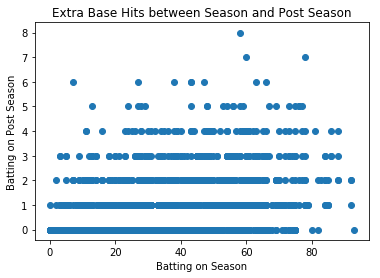

In [29]:
merged = pd.merge(Batting_clean, BattingPost_clean, how='left', left_on=['yearID', 'playerID'], right_on=['yearID', 'playerID'])
plt.scatter(merged['XBH_x'], merged['XBH_y'])
plt.title('Extra Base Hits between Season and Post Season')
plt.xlabel('Batting on Season')
plt.ylabel('Batting on Post Season')
plt.show()

# On Base Precentage

$$On\ Base\ Precentage = \frac{Hits+Base\ on\ Ball+Hit\ By\ Pitch}{At\ Bats+Base\ on\ Ball+Hit\ By\ Pitch+Sacrifice\ Flies}$$

In [30]:
Batting_clean['OBP'] = (Batting_clean['H'] + Batting_clean['BB'] + Batting_clean['HBP'])/(Batting_clean['AB'] + Batting_clean['BB'] + Batting_clean['HBP'] + Batting_clean['SF'])
BattingPost_clean['OBP'] = (BattingPost_clean['H'] + BattingPost_clean['BB'] + BattingPost_clean['HBP'])/(BattingPost_clean['AB'] + BattingPost_clean['BB'] + BattingPost_clean['HBP'] + BattingPost_clean['SF'])

This is the plot of Batting.


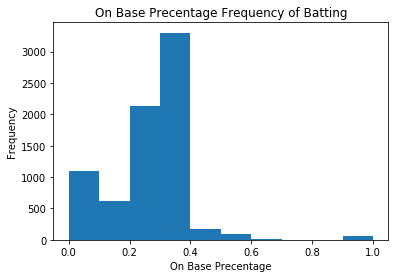

This is the plot of BattingPost.


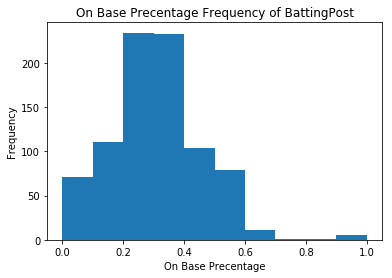

In [31]:
for df, title in zip([Batting_clean,  BattingPost_clean], ['Batting', 'BattingPost']):
    print('This is the plot of %s.' % title)
    df['OBP'].plot(kind='hist', bins=10)
    plt.title('On Base Precentage Frequency of %s' % title)
    plt.xlabel('On Base Precentage')
    plt.ylabel('Frequency')
    plt.show()

This is the plot of Batting.


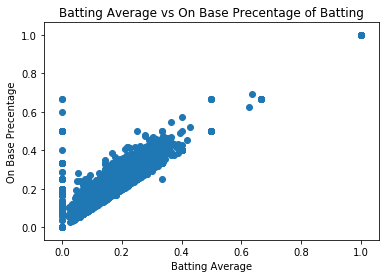

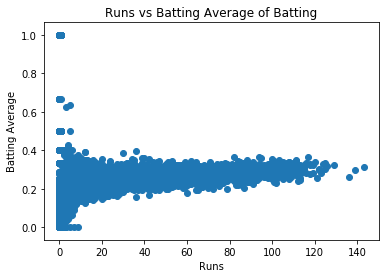

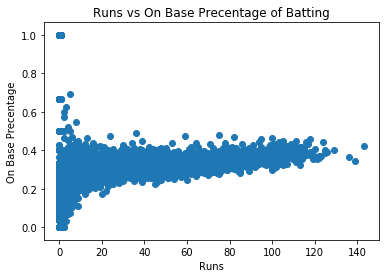

This is the plot of BattingPost.


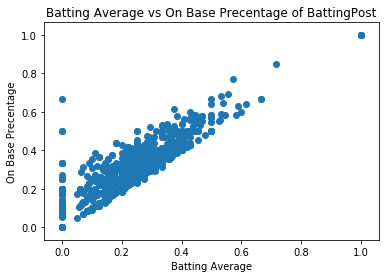

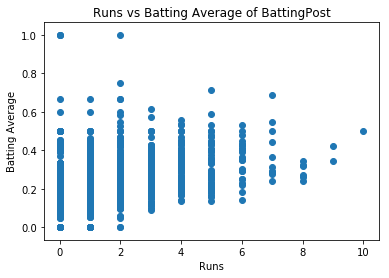

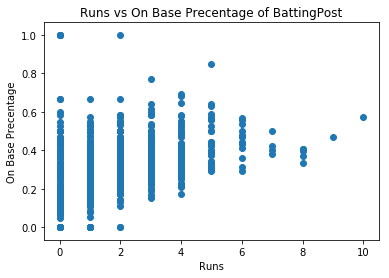

In [32]:
for df, title in zip([Batting_clean,  BattingPost_clean], ['Batting', 'BattingPost']):
    print('This is the plot of %s.' % title)
    plt.scatter(df['BA'], df['OBP'])
    plt.title('Batting Average vs On Base Precentage of %s' % title)
    plt.xlabel('Batting Average')
    plt.ylabel('On Base Precentage')
    plt.show()
    for col, colname in zip(['BA', 'OBP'], ['Batting Average', 'On Base Precentage']):
        plt.scatter(df['R'], df[col])
        plt.title('Runs vs %s of %s' % (colname, title))
        plt.xlabel('Runs')
        plt.ylabel(colname)
        plt.show()

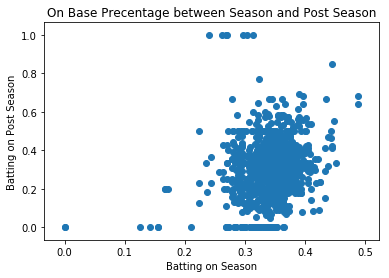

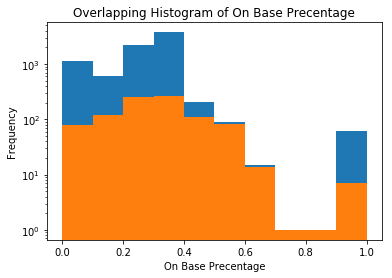

In [33]:
merged = pd.merge(Batting_clean, BattingPost_clean, how='left', left_on=['yearID', 'playerID'], right_on=['yearID', 'playerID'])
plt.scatter(merged['OBP_x'], merged['OBP_y'])
plt.title('On Base Precentage between Season and Post Season')
plt.xlabel('Batting on Season')
plt.ylabel('Batting on Post Season')
plt.show()
fig, ax = plt.subplots()
merged['OBP_x'].plot(ax=ax, kind='hist', bins=10, logy=True, title='Batting on Season')
merged['OBP_y'].plot(ax=ax, kind='hist', bins=10, logy=True, title='Batting on Post Season')
plt.title('Overlapping Histogram of On Base Precentage')
plt.xlabel('On Base Precentage')
plt.ylabel('Frequency')
plt.show()

# Weighted On-Base Average ver.FANGRAPHS

$$ Weighted\ On-Base\ Average
= \frac{(0.69 \times uBB + 0.72 \times HBP + 0.89 \times 1B + 1.27 \times 2B + 1.62 \times 3B + 2.10 \times HR)}{AB + uBB + SF + HBP} $$

*(source: https://www.fangraphs.com/library/offense/woba/)*

In [34]:
Batting_clean['1B'] = Batting_clean['H'] - Batting_clean['XBH']
Batting_clean['uBB'] = Batting_clean['BB'] - Batting_clean['IBB']
BattingPost_clean['1B'] = BattingPost_clean['H'] - BattingPost_clean['XBH']
BattingPost_clean['uBB'] = BattingPost_clean['BB'] - BattingPost_clean['IBB']

In [35]:
Batting_clean['wOBA'] = (0.69 * Batting_clean['uBB'] + 0.72 * Batting_clean['HBP'] + 0.89 * Batting_clean['1B'] + 1.27 * Batting_clean['2B'] + 1.62 * Batting_clean['3B'] + 2.10 * Batting_clean['HR'])/(Batting_clean['AB'] + Batting_clean['uBB'] + Batting_clean['HBP'] + Batting_clean['SF'])
BattingPost_clean['wOBA'] = (0.69 * BattingPost_clean['uBB'] + 0.72 * BattingPost_clean['HBP'] + 0.89 * BattingPost_clean['1B'] + 1.27 * BattingPost_clean['2B'] + 1.62 * BattingPost_clean['3B'] + 2.10 * BattingPost_clean['HR'])/(BattingPost_clean['AB'] + BattingPost_clean['uBB'] + BattingPost_clean['HBP'] + BattingPost_clean['SF'])

These are the plots of Batting.


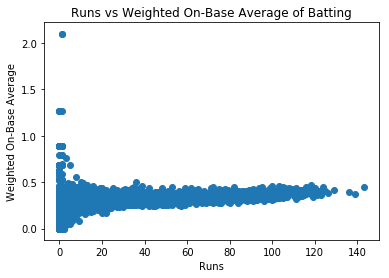

These are the plots of BattingPost.


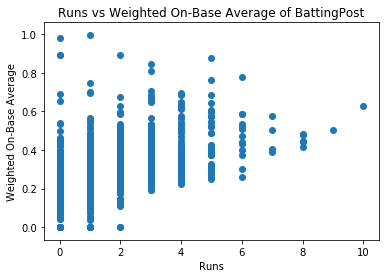

In [36]:
for df, title in zip([Batting_clean,  BattingPost_clean], ['Batting', 'BattingPost']):
    print('These are the plots of %s.' % title)
    plt.scatter(df['R'], df['wOBA'])
    plt.title('Runs vs Weighted On-Base Average of %s' % title)
    plt.xlabel('Runs')
    plt.ylabel('Weighted On-Base Average')
    plt.show()

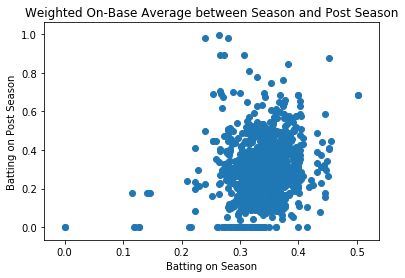

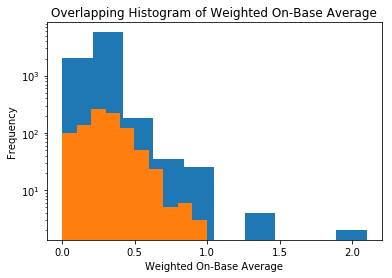

In [37]:
merged = pd.merge(Batting_clean, BattingPost_clean, how='left', left_on=['yearID', 'playerID'], right_on=['yearID', 'playerID'])
plt.scatter(merged['wOBA_x'], merged['wOBA_y'])
plt.title('Weighted On-Base Average between Season and Post Season')
plt.xlabel('Batting on Season')
plt.ylabel('Batting on Post Season')
plt.show()
fig, ax = plt.subplots()
merged['wOBA_x'].plot(ax=ax, kind='hist', bins=10, logy=True, title='Batting on Season')
merged['wOBA_y'].plot(ax=ax, kind='hist', bins=10, logy=True, title='Batting on Post Season')
plt.title('Overlapping Histogram of Weighted On-Base Average')
plt.xlabel('Weighted On-Base Average')
plt.ylabel('Frequency')
plt.show()

# Slugging Percentage

$$ Slugging\ Precentage = \frac{Single + 2 \times Doubles + 3 \times Triples + 4 \times Home\ Runs}{At\ Bats}$$

In [38]:
Batting_clean['SLG'] = (Batting_clean['1B'] + 2 * Batting_clean['2B'] + 3 * Batting_clean['3B'] + 4 * Batting_clean['HR']) / Batting_clean['AB']
BattingPost_clean['SLG'] = (BattingPost_clean['1B'] + 2 * BattingPost_clean['2B'] + 3 * BattingPost_clean['3B'] + 4 * BattingPost_clean['HR']) / BattingPost_clean['AB']

These are the plots of Batting.


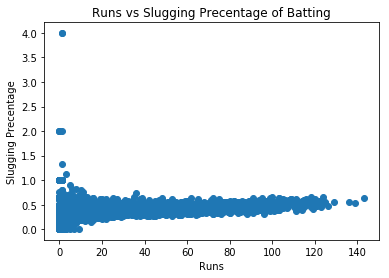

These are the plots of BattingPost.


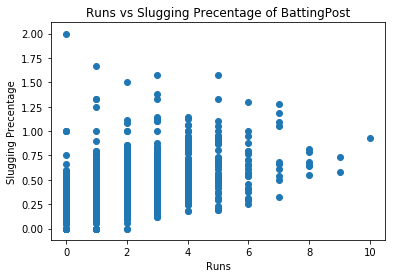

In [39]:
for df, title in zip([Batting_clean,  BattingPost_clean], ['Batting', 'BattingPost']):
    print('These are the plots of %s.' % title)
    plt.scatter(df['R'], df['SLG'])
    plt.title('Runs vs Slugging Precentage of %s' % title)
    plt.xlabel('Runs')
    plt.ylabel('Slugging Precentage')
    plt.show()

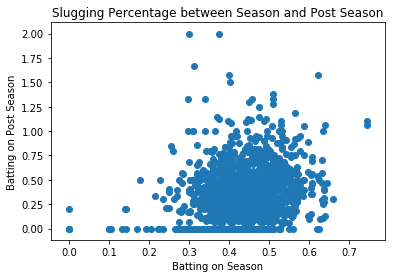

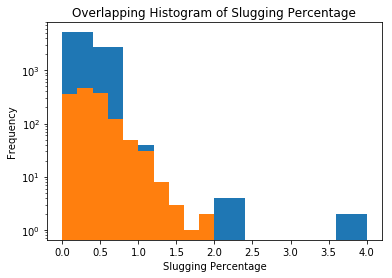

In [40]:
merged = pd.merge(Batting_clean, BattingPost_clean, how='left', left_on=['yearID', 'playerID'], right_on=['yearID', 'playerID'])
plt.scatter(merged['SLG_x'], merged['SLG_y'])
plt.title('Slugging Percentage between Season and Post Season')
plt.xlabel('Batting on Season')
plt.ylabel('Batting on Post Season')
plt.show()
fig, ax = plt.subplots()
merged['SLG_x'].plot(ax=ax, kind='hist', bins=10, logy=True, title='Batting on Season')
merged['SLG_y'].plot(ax=ax, kind='hist', bins=10, logy=True, title='Batting on Post Season')
plt.title('Overlapping Histogram of Slugging Percentage')
plt.xlabel('Slugging Percentage')
plt.ylabel('Frequency')
plt.show()

# Some Browsing of data

In [41]:
#print(len(Batting_clean[Batting_clean['OBP'] == 1.0]))
#print(len(BattingPost_clean[BattingPost_clean['OBP'] == 1.0]))

In [42]:
Batting_clean[Batting_clean['OBP'] == 1.0].iloc[0]

playerID    cappsma01
yearID           2007
stint               1
teamID            PIT
lgID               NL
G                  76
AB                  1
R                   0
H                   1
2B                  0
3B                  0
HR                  0
RBI                 0
SB                  0
CS                  0
BB                  0
SO                  0
IBB                 0
HBP                 0
SH                  0
SF                  0
GIDP                0
BA                  1
XBH                 0
OBP                 1
1B                  1
uBB                 0
wOBA             0.89
SLG                 1
Name: 88891, dtype: object

In [43]:
#print(len(Batting_clean[(Batting_clean['BA'] == 1.0) & (Batting_clean['OBP'] == 1.0)]))
#print(len(BattingPost_clean[(BattingPost_clean['BA'] == 1.0) & (BattingPost_clean['OBP'] == 1.0)]))
#print(len(Batting_clean[Batting_clean['wOBA'] > 2.0]))
#print(len(BattingPost_clean[BattingPost_clean['wOBA'] > 2.0]))
#print(len(Batting_clean[Batting_clean['SLG'] > 2.0]))
#print(len(BattingPost_clean[BattingPost_clean['SLG'] > 2.0]))

# Linear Regression of BA, OBP, wOBA, SLG

In [44]:
Batting_clean2 = Batting_clean.dropna(axis=0, how='any')
BattingPost_clean2 = BattingPost_clean.dropna(axis=0, how='any')

In [45]:
for df, title in zip([Batting_clean2, BattingPost_clean2], ['Batting', 'BattingPost']):
    for variable in [['OBP', 'SLG', 'BA'], ['OBP', 'SLG',], ['BA']]:
        print('This is the model of', ' + '.join(variable), 'regresse to Runs in', title)
        runs_reg_model = LinearRegression().fit(df[variable], df['R'])
        print('R2 Score is: ', runs_reg_model.score(df[variable], df['R']))
        print('Mean Squared Error is: ', mean_squared_error(df['R'], runs_reg_model.predict(df[variable])))
        print('Intercept is: ', runs_reg_model.intercept_)
        for col, coef in zip(variable, runs_reg_model.coef_):
            print('%s\'s coef is: %.4f' % (col, coef))
        print('--------------------------------------')
    print('--------------------------------------')

This is the model of OBP + SLG + BA regresse to Runs in Batting
R2 Score is:  0.308928984367
Mean Squared Error is:  581.281747178
Intercept is:  -2.05938309943
OBP's coef is: 86.4266
SLG's coef is: 96.6875
BA's coef is: -120.3320
--------------------------------------
This is the model of OBP + SLG regresse to Runs in Batting
R2 Score is:  0.285510046081
Mean Squared Error is:  600.980158854
Intercept is:  -1.28760206773
OBP's coef is: 19.0096
SLG's coef is: 70.6641
--------------------------------------
This is the model of BA regresse to Runs in Batting
R2 Score is:  0.195327581613
Mean Squared Error is:  676.835489674
Intercept is:  3.0174368256
BA's coef is: 109.2649
--------------------------------------
--------------------------------------
This is the model of OBP + SLG + BA regresse to Runs in BattingPost
R2 Score is:  0.285593925127
Mean Squared Error is:  1.94583210414
Intercept is:  0.427660332111
OBP's coef is: 3.2056
SLG's coef is: 3.4193
BA's coef is: -4.0667
----------

In [46]:
salries = pd.merge(database['Salaries'], Batting_clean2, how='left', left_on=['yearID', 'playerID'], right_on=['yearID', 'playerID']).dropna()

In [47]:
salries['salary_ln'] = np.log(salries['salary'])

In [48]:
variable = ['R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO']
salary_reg_model_bk = LinearRegression().fit(salries[variable], salries['salary_ln'])
print('R2 Score: ', salary_reg_model_bk.score(salries[variable], salries['salary_ln']))
print('Mean Squared Error is: ', mean_squared_error(salries['salary_ln'], salary_reg_model_bk.predict(salries[variable])))
for col, coef in zip(variable, salary_reg_model_bk.coef_):
    print('%s\'s coef is: %.4f' % (col, coef))

R2 Score:  0.0985347661216
Mean Squared Error is:  1.4981593278
R's coef is: -0.0027
H's coef is: 0.0058
2B's coef is: -0.0109
3B's coef is: -0.0853
HR's coef is: 0.0167
RBI's coef is: 0.0069
SB's coef is: -0.0012
BB's coef is: 0.0113
SO's coef is: -0.0080


In [49]:
for variable in [['OBP', 'SLG', 'BA'], ['OBP', 'SLG',], ['BA']]:
    print('This is the model of', ' + '.join(variable), 'regresse to log Salary.')
    salary_reg_model = LinearRegression().fit(salries[['SLG']], salries['salary_ln'])
    print('R2 Score: ', salary_reg_model.score(salries[['SLG']], salries['salary_ln']))
    for col, coef in zip(variable, salary_reg_model.coef_):
        print('%s\'s coef is: %.4f' % (col, coef))
    print('--------------------------------------')

This is the model of OBP + SLG + BA regresse to log Salary.
R2 Score:  0.0167526140111
OBP's coef is: 0.9207
--------------------------------------
This is the model of OBP + SLG regresse to log Salary.
R2 Score:  0.0167526140111
OBP's coef is: 0.9207
--------------------------------------
This is the model of BA regresse to log Salary.
R2 Score:  0.0167526140111
BA's coef is: 0.9207
--------------------------------------


### Benchmark by Teams Record  

In [50]:
def ratio_analysis(dataframe):
    dataframe['BA'] = dataframe['H'] / dataframe['AB']
    dataframe['OBP'] = (dataframe['H'] + dataframe['BB'] + dataframe['HBP'])/(dataframe['AB'] + dataframe['BB'] + dataframe['HBP'] + dataframe['SF'])
    dataframe['XBH'] = dataframe['2B'] + dataframe['3B'] + dataframe['HR']
    dataframe['1B'] = dataframe['H'] - dataframe['XBH']
    dataframe['SLG'] = (dataframe['1B'] + 2 * dataframe['2B'] + 3 * dataframe['3B'] + 4 * dataframe['HR']) / dataframe['AB']
    return dataframe

In [51]:
Teams = database['Teams'][database['Teams']['yearID'] >= 1985]
Teams = Teams[['yearID', 'teamID', 'Rank', 'R', 'RA', 'G', 'W', 'H', 'BB', 'HBP', 'AB', 'SF', 'HR', '2B', '3B']].dropna()
Teams = ratio_analysis(Teams)
Teams = Teams.set_index(['yearID', 'teamID'])
salaries_by_yearID_teamID = database['Salaries'].groupby(['yearID', 'teamID'])['salary'].sum()
Teams = Teams.join(salaries_by_yearID_teamID)

In [52]:
for variable in [['OBP', 'SLG', 'BA'], ['OBP', 'SLG',], ['BA']]:
    print('This is the model of', ' + '.join(variable), '...')
    runs_reg_model = LinearRegression().fit(Teams[variable], Teams['R'])
    print('R2 Score is: ', runs_reg_model.score(Teams[variable], Teams['R']))
    for col, coef in zip(variable, runs_reg_model.coef_):
        print('%s\'s coef is: %.4f' % (col, coef))
    print('--------------------------------------')

This is the model of OBP + SLG + BA ...
R2 Score is:  0.917207349418
OBP's coef is: 2676.1463
SLG's coef is: 1741.7825
BA's coef is: 14.0816
--------------------------------------
This is the model of OBP + SLG ...
R2 Score is:  0.917206330656
OBP's coef is: 2683.4824
SLG's coef is: 1743.4936
--------------------------------------
This is the model of BA ...
R2 Score is:  0.663830500275
BA's coef is: 5765.6377
--------------------------------------


### Batting Record before Money Ball

In [53]:
Batting_clean_old = database['Batting'][(database['Batting']['yearID'] < 2003) & (database['Batting']['G'] > 13.0)].dropna()
Batting_clean_old = ratio_analysis(Batting_clean_old)

In [54]:
salries_old = pd.merge(database['Salaries'], Batting_clean_old, how='left', left_on=['yearID', 'playerID'], right_on=['yearID', 'playerID'])
salries_old['salary_ln'] = np.log(salries_old['salary'])
salries_old = salries_old.replace([np.inf, -np.inf], np.nan).dropna()

In [55]:
for variable in [['OBP', 'SLG', 'BA'], ['OBP', 'SLG',], ['BA']]:
    print('This is the model of', ' + '.join(variable), 'regresse to Runs.')
    runs_reg_model = LinearRegression().fit(salries_old[variable], salries_old['R'])
    print('R2 Score is: ', runs_reg_model.score(salries_old[variable], salries_old['R']))
    for col, coef in zip(variable, runs_reg_model.coef_):
        print('%s\'s coef is: %.4f' % (col, coef))
    print('--------------------------------------')
for variable in [['OBP', 'SLG', 'BA'], ['OBP', 'SLG',], ['BA']]:
    print('This is the model of', ' + '.join(variable), 'regresse to log Salary.')
    salary_reg_model = LinearRegression().fit(salries_old[variable], salries_old['salary_ln'])
    print('R2 Score is: ', salary_reg_model.score(salries_old[variable], salries_old['salary_ln']))
    for col, coef in zip(variable, salary_reg_model.coef_):
        print('%s\'s coef is: %.4f' % (col, coef))
    print('--------------------------------------')

This is the model of OBP + SLG + BA regresse to Runs.
R2 Score is:  0.292877164379
OBP's coef is: 116.2544
SLG's coef is: 88.6719
BA's coef is: -128.7778
--------------------------------------
This is the model of OBP + SLG regresse to Runs.
R2 Score is:  0.270477258741
OBP's coef is: 43.4467
SLG's coef is: 62.2030
--------------------------------------
This is the model of BA regresse to Runs.
R2 Score is:  0.187145030514
BA's coef is: 122.6925
--------------------------------------
This is the model of OBP + SLG + BA regresse to log Salary.
R2 Score is:  0.0237147403
OBP's coef is: 1.2868
SLG's coef is: 1.5537
BA's coef is: -2.5708
--------------------------------------
This is the model of OBP + SLG regresse to log Salary.
R2 Score is:  0.018303916721
OBP's coef is: -0.1666
SLG's coef is: 1.0253
--------------------------------------
This is the model of BA regresse to log Salary.
R2 Score is:  0.00836284330214
BA's coef is: 1.0535
--------------------------------------


# Decision Tree Regressor

In [56]:
variable = ['R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'OBP', 'SLG', 'BA']
salary_reg_tree = DecisionTreeRegressor(max_depth=3).fit(salries[variable], salries['salary'])

In [57]:
tree_file = open('salary_reg_tree.dot', 'w')
export_graphviz(salary_reg_tree, out_file=tree_file, feature_names=variable)
tree_file.close()

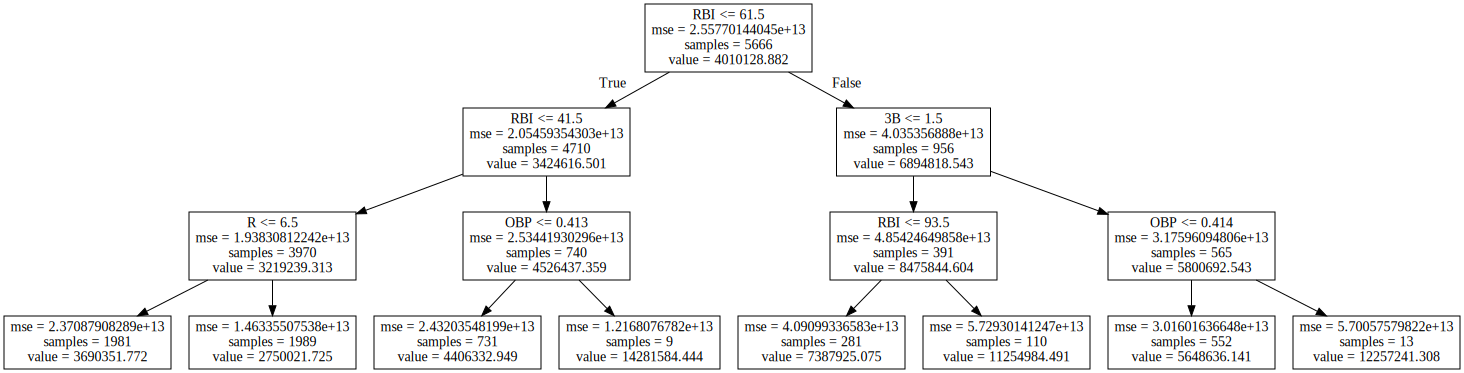

In [58]:
with open('salary_reg_tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [59]:
check_call(['dot','-Tpng','salary_reg_tree.dot','-o','salary_reg_tree.png'])

0

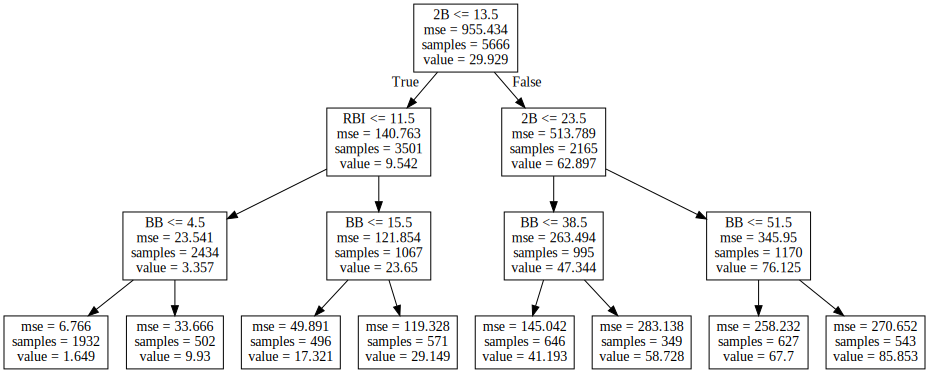

In [60]:
variable = ['2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'OBP', 'SLG', 'BA']
runs_reg_tree = DecisionTreeRegressor(max_depth=3).fit(salries[variable], salries['R'])
tree_file = open('runs_reg_tree.dot', 'w')
export_graphviz(runs_reg_tree, out_file=tree_file, feature_names=variable)
tree_file.close()
with open('runs_reg_tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [61]:
check_call(['dot','-Tpng','runs_reg_tree.dot','-o','runs_reg_tree.png'])

0